In [23]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [3]:
ms = gpd.read_file('./ms/MS_Municipios_2020/MS_Municipios_2020.shp')

<AxesSubplot:>

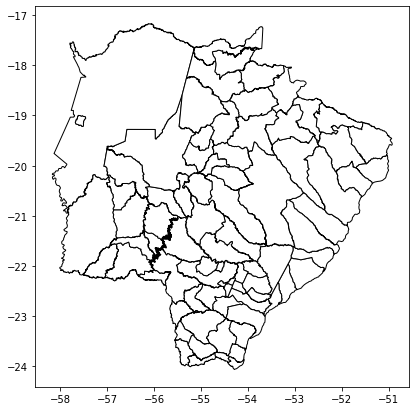

In [5]:
ms.plot(color='white', edgecolor='black', figsize=(13, 7))

In [10]:
cg = ms[ms['NM_MUN'] == 'Campo Grande']

<AxesSubplot:>

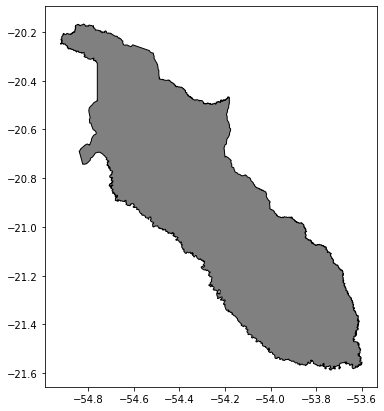

In [12]:
cg.plot(color='gray', edgecolor='black', figsize=(13, 7))

In [13]:
cg.to_file('./cg_munic/cg-munic.shp')

/home/motoko/anaconda3/envs/geo_env/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [15]:
setor = gpd.read_file('./cg_setor/cg_setor.shp')

In [19]:
setor.to_crs(epsg=4674, inplace=True)

In [21]:
upa = pd.read_csv('./UPAS.csv', sep=',')

In [22]:
upa

,NOME,LONGITUDE,LATITUDE
0,UPA SANTA MÔNICA,-54.709770,-20.456211
1,UPA LEBLOM,-54.652149,-20.492453
2,UPA UNIVERSITARIO,-54.598573,-20.525100
3,UPA VILA ALMEIDA,-54.657400,-20.439624
4,UPA CEL.ANTONINO,-54.600753,-20.431635
5,UPA MORENINHA III,-54.573314,-20.555499


In [25]:
geometry = [Point(x) for x in zip(upa.LONGITUDE, upa.LATITUDE)]

In [29]:
upa = gpd.GeoDataFrame(upa, crs='+proj=longlat +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +no_defs ', geometry=geometry)

In [30]:
upa

,NOME,LONGITUDE,LATITUDE,geometry
0,UPA SANTA MÔNICA,-54.709770,-20.456211,POINT (-54.70977 -20.45621)
1,UPA LEBLOM,-54.652149,-20.492453,POINT (-54.65215 -20.49245)
2,UPA UNIVERSITARIO,-54.598573,-20.525100,POINT (-54.59857 -20.52510)
3,UPA VILA ALMEIDA,-54.657400,-20.439624,POINT (-54.65740 -20.43962)
4,UPA CEL.ANTONINO,-54.600753,-20.431635,POINT (-54.60075 -20.43163)
5,UPA MORENINHA III,-54.573314,-20.555499,POINT (-54.57331 -20.55550)


<AxesSubplot:>

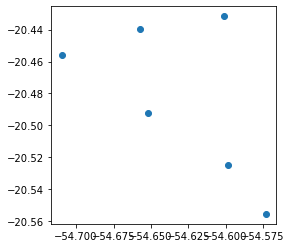

In [31]:
upa.plot()

In [32]:
upa.crs

<Bound CRS: +proj=longlat +ellps=GRS80 +towgs84=0,0,0,0,0,0,0  ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [33]:
cg.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

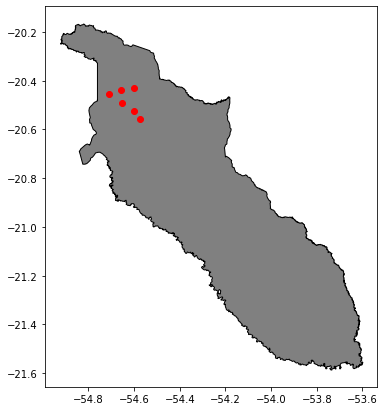

In [34]:
base = cg.plot(color='gray', edgecolor='black', figsize=(13, 7))
upa.plot(ax=base, color='red')

In [35]:
upa.to_file('./upa/upa_cg.shp')

/home/motoko/anaconda3/envs/geo_env/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
